In [1]:
# Pipeline for analyzing all 10000 shots for ePix Runs 18-20
# Calculated Timing Jitter for each, measured in Femtoseconds
# Last ran 08/08/2025

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from scipy.ndimage import gaussian_filter1d

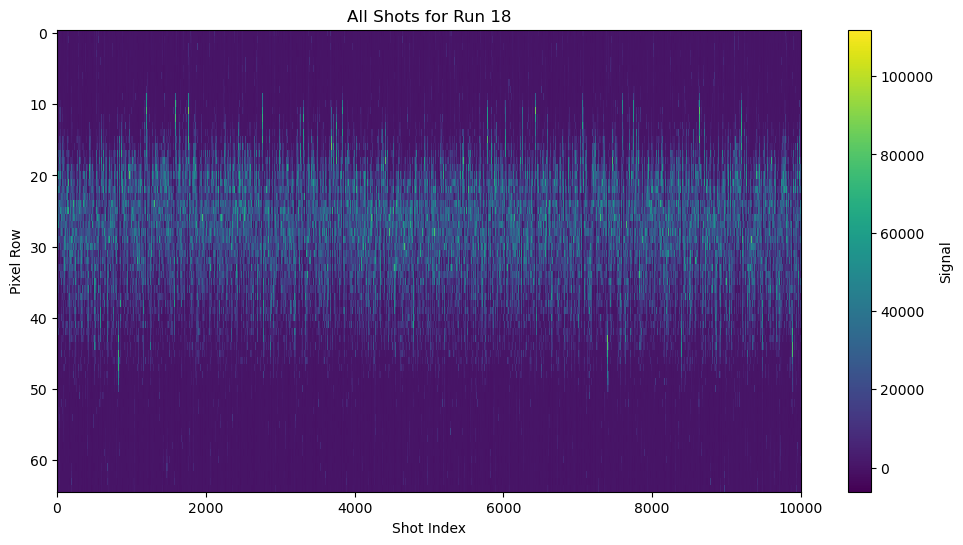

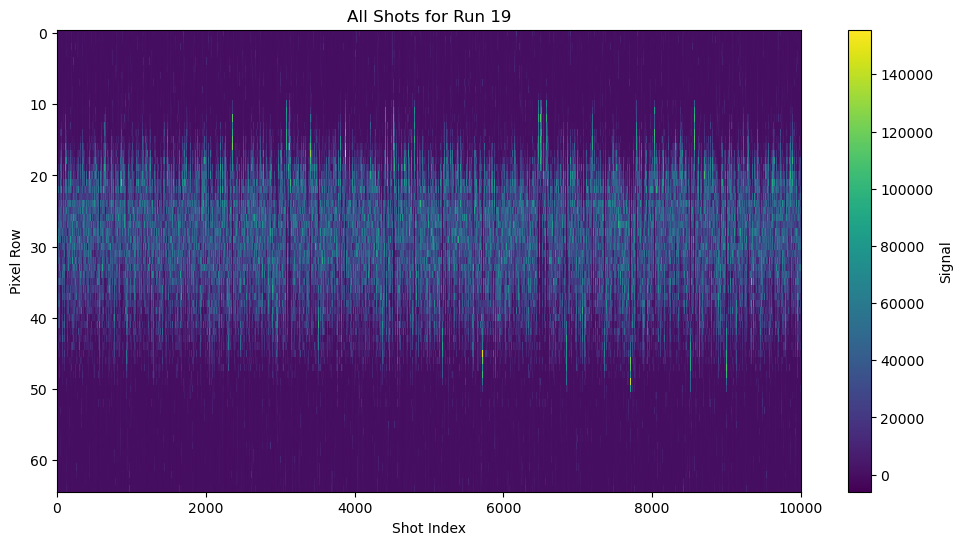

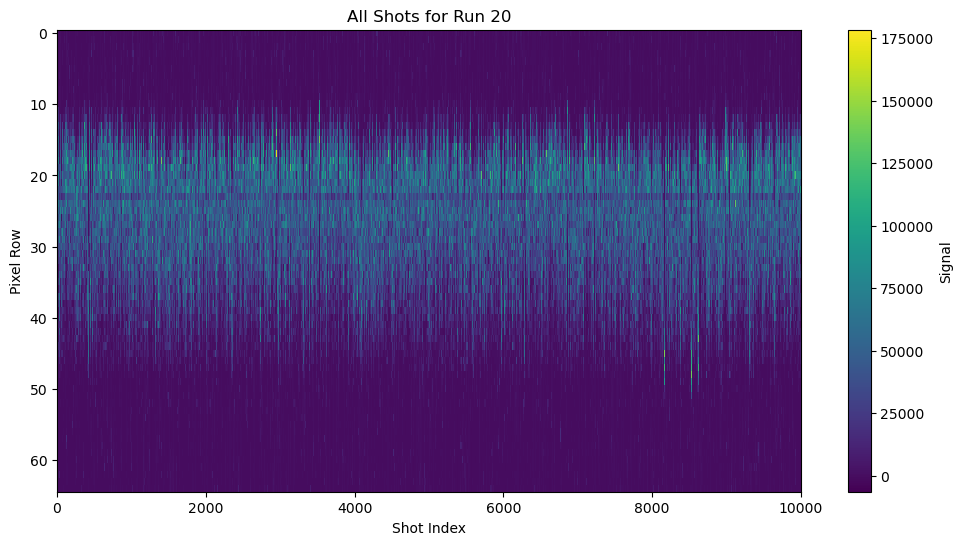

In [3]:
data_dir = '/sdf/group/rfar/timodo/ePix_Runs_Pixel_Sum_Data/'

runs = [18, 19, 20]
for run in runs:
    file_path = os.path.join(data_dir, f'run_{run}_all_sumY.npz')
    npz = np.load(file_path)
    sumY = npz["sumY"]

    fig, ax = plt.subplots(figsize=(12, 6))
    img = ax.imshow(np.transpose(sumY), aspect='auto', interpolation='nearest')
    plt.xlim([0, sumY.shape[0]])  # adjust according to actual shots count
    plt.xlabel('Shot Index')
    plt.ylabel('Pixel Row')
    plt.title(f'All Shots for Run {run}')
    plt.colorbar(img, ax=ax, label='Signal')
    plt.show()

In [4]:
com_dict = {}

for run in runs:
    file_path = os.path.join(data_dir, f'run_{run}_all_sumY.npz')
    npz = np.load(file_path)
    sumY = npz["sumY"]
    # Adapt to shape of sumY (N_shots, N_pixels)
    y_pixels = npz["y_pixels"] if "y_pixels" in npz else np.arange(sumY.shape[1])
    com_values = []
    for shot in sumY:
        total = np.sum(shot)
        com = np.nan if total == 0 else np.sum(shot * y_pixels) / total
        com_values.append(com)
    com_dict[run] = np.array(com_values)

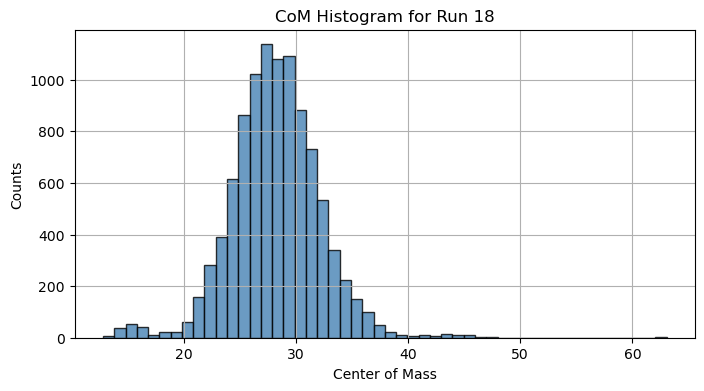

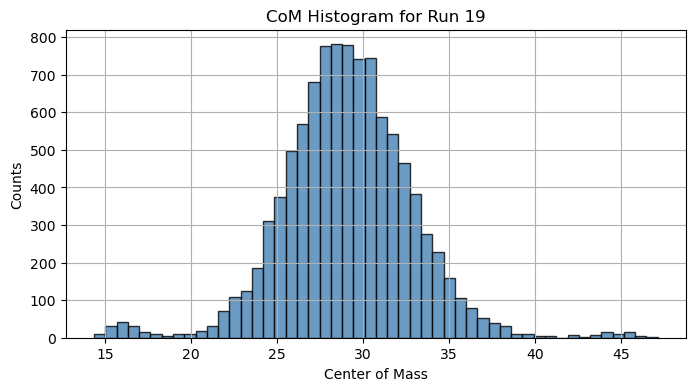

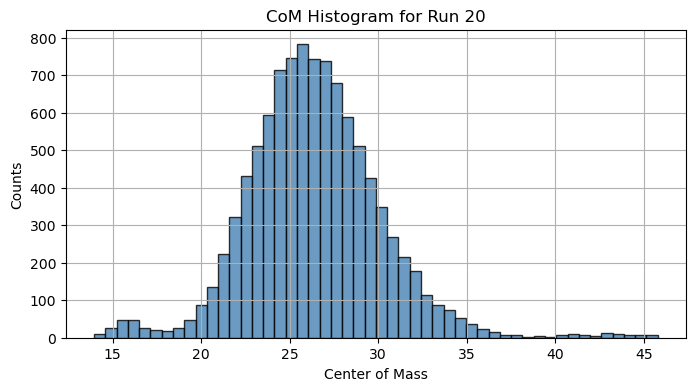

In [5]:
for run in runs:
    com_values = com_dict[run]
    valid_com = com_values[~np.isnan(com_values)]
    # Adjust decimal precision as needed, e.g., 0.01 for tight grouping
    rounded_com = np.round(valid_com, decimals=2)

    plt.figure(figsize=(8,4))
    plt.hist(rounded_com, bins=50, color='steelblue', edgecolor='black', alpha=0.8)
    plt.xlabel('Center of Mass')
    plt.ylabel('Counts')
    plt.title(f'CoM Histogram for Run {run}')
    plt.grid(True)
    plt.show()

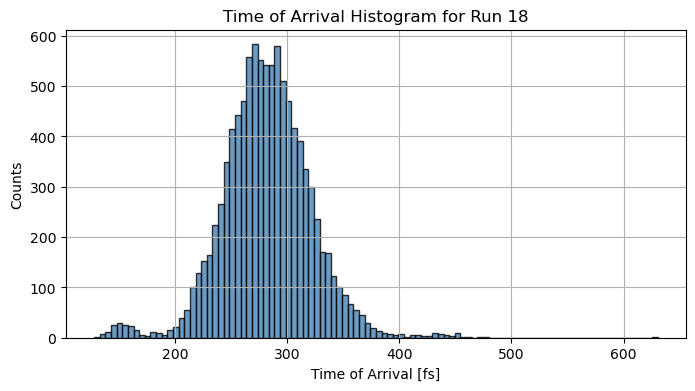

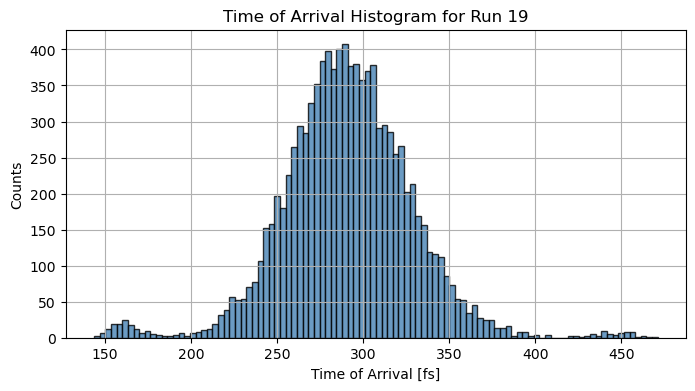

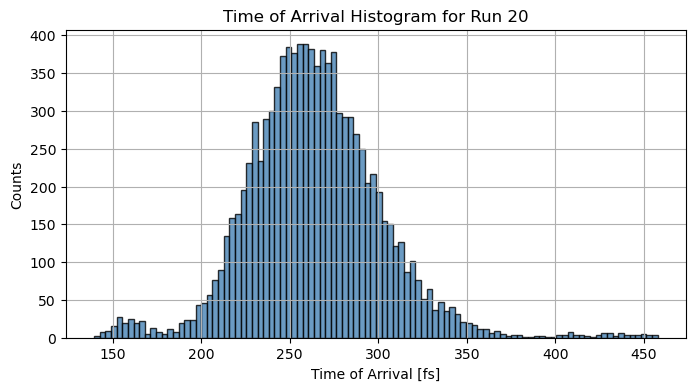

In [6]:
calibration_slope = 10.0  # fs per pixel (example value)
calibration_offset = 0.0  # fs offset (example value)

toa_dict = {}
for run in runs:
    file_path = os.path.join(data_dir, f'run_{run}_all_sumY.npz')
    npz = np.load(file_path)
    sumY = npz["sumY"]
    y_pixels_raw = npz["y_pixels"] if "y_pixels" in npz else np.arange(sumY.shape[1])

    # Convert from pixel index to femtoseconds
    y_pixels_fs = calibration_slope * y_pixels_raw + calibration_offset

    toa_values = []
    for shot in sumY:
        total = np.sum(shot)
        # CoM along time axis = Time of Arrival if calibrated
        toa = np.nan if total == 0 else np.sum(shot * y_pixels_fs) / total
        toa_values.append(toa)
    toa_dict[run] = np.array(toa_values)

# Plotting histograms in mentor's style
for run in runs:
    toas = toa_dict[run]
    valid_toas = toas[~np.isnan(toas)]
    plt.figure(figsize=(8,4))
    plt.hist(valid_toas, bins=100, color='steelblue', edgecolor='black', alpha=0.8)
    plt.xlabel('Time of Arrival [fs]')
    plt.ylabel('Counts')
    plt.title(f'Time of Arrival Histogram for Run {run}')
    plt.grid(True)
    plt.show()